# Convolution
In image processing, convolution is performed on images with a kernel or filter. The general equation is
$$
g(x,y) = \omega * f(x,y) = \sum_{x=-a}^a \sum_{x=-b}^b \omega(a,b)f(x-a, y-b),
$$
where $*$ is the convolution operator, $f(x,y)$ is the image, $\omega$ is the filter, $a$ is the width of the kernel, and $b$ is the height of the kernel.

### Image reading
This code works with grayscale images. If it's given an image with multiple channels, it takes the first.

Read in rice.png. Shape: (512, 512)


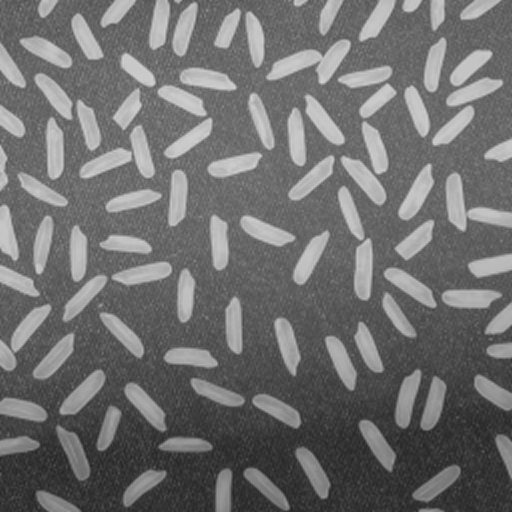

In [1]:
from PIL import Image
import numpy as np


image_path = 'rice.png'

# Read in image and store as an array
image = np.asarray(Image.open(image_path))
if image.ndim > 2:
    # Only use first channel
    image = image[:,:,0]
print(f'Read in {image_path}. Shape: {image.shape}')
width = image.shape[1]
height = image.shape[0]
Image.fromarray(image)

### Convolution function
No vectorization here. How can you speed it up?

In [2]:
def Convolve(filter: np.ndarray, image: np.ndarray) -> np.ndarray:
    # Half size, not including the middle
    filter_size = filter.shape
    h_rows = int((filter_size[0] - 1) / 2)
    h_cols = int((filter_size[1] - 1) / 2)
    filt_rows = filter.shape[0]
    filt_cols = filter.shape[1]

    # Initialize convolved image with zeros
    # What does zeroing do to the borders? What's some alternatives?
    conv_image = np.zeros(image.shape)

    for row in np.arange(0 + h_rows, height - h_rows):
        for col in np.arange(0 + h_cols, width - h_cols):
            # Grab neighborhood of points from original image
            neighborhood = np.array(image[row - h_rows:row + h_rows + 1,
                                          col - h_cols:col + h_cols + 1])
            # Convolve
            for i in np.arange(filt_rows):
                for j in np.arange(filt_cols):
                    conv_image[row, col] += neighborhood[i,j] * filter[i,j]
    
    # What happens if we don't clip values?
    conv_image = np.clip(conv_image, 0, 255)

    return conv_image.astype(np.ubyte)


### Filters
Filters can provide a large variety of different effects. You may be able to tell what a filter does by looking at it. What doe the following filters achieve?

In [3]:
sobel_x = np.array([[ 1,  0, -1 ],
                    [ 2,  0, -2 ],
                    [ 1,  0, -1 ]])

sobel_y = np.array([[ 1,  2,  1 ],
                    [ 0,  0,  0 ],
                    [-1, -2, -1 ]])

gaussian = np.array([[1, 4, 7, 4, 1],
                     [4, 16, 26, 16, 4],
                     [7, 26, 41, 26, 7],
                     [4, 16, 26, 16, 4],
                     [1, 4, 7, 4, 1]]) * 1/273

laplace = np.array([[ 0, -1,  0],
                    [-1,  4, -1],
                    [ 0, -1,  0]])

img_sx  = Convolve(sobel_x, image)
img_sy  = Convolve(sobel_y, image)
img_sxy = Convolve(sobel_y, Convolve(sobel_x, image))
img_ga  = Convolve(gaussian, image)
img_la  = Convolve(laplace, image)


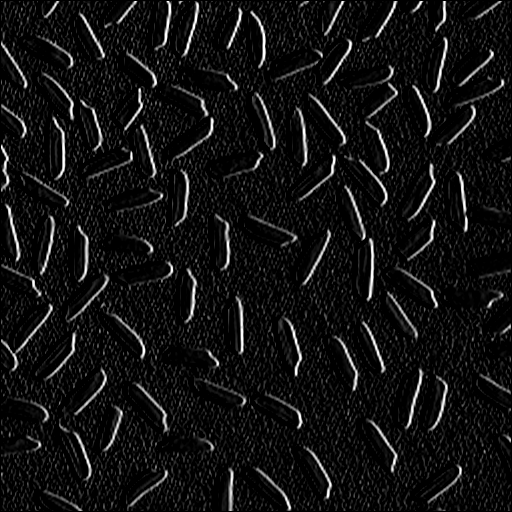

In [4]:
Image.fromarray(img_sx)

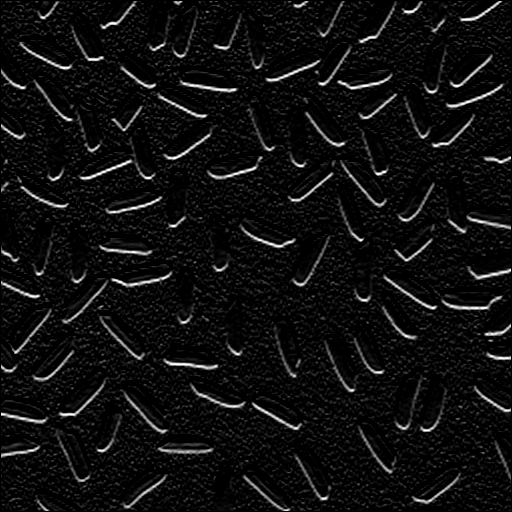

In [5]:
Image.fromarray(img_sy)

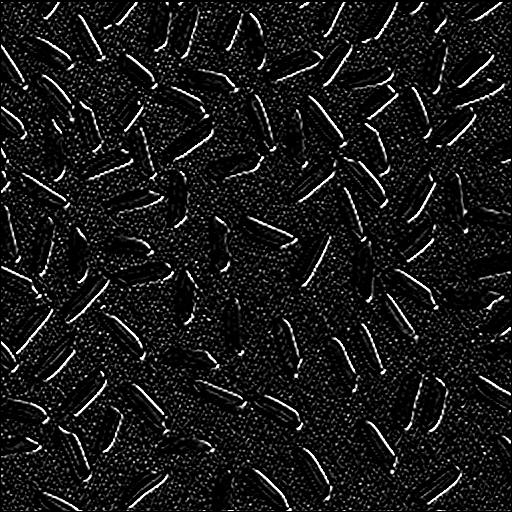

In [6]:
Image.fromarray(img_sxy)

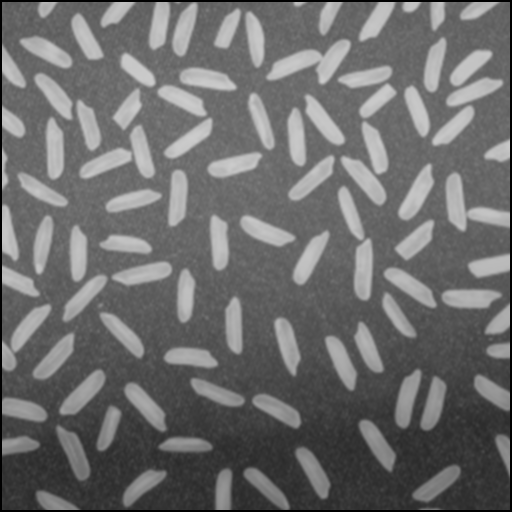

In [7]:
Image.fromarray(img_ga)

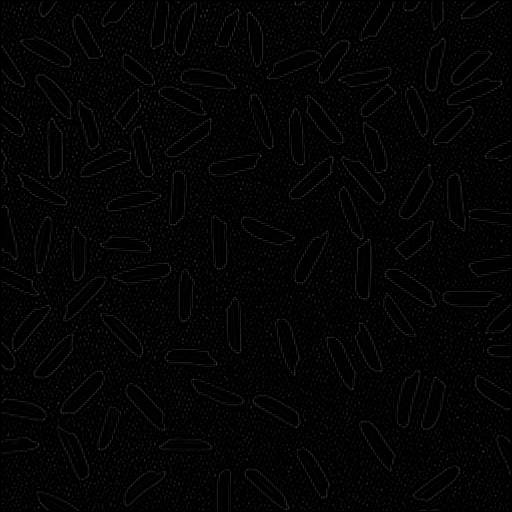

In [8]:
Image.fromarray(img_la)